In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import numpy as np
import pickle

# Measuring mean and variance for times in Local DNS

In [22]:
dns_times = []
with open('../../dns-performance.txt', 'r') as file:
    for line in file.readlines():
        dns_times.append(round(float(line)*1000,2))
dns_times = sorted(dns_times)
mean = sum(dns_times) / len(dns_times)
var = math.sqrt(sum((xi - mean) ** 2 for xi in dns_times) / len(dns_times))
print('Mean: %.2f ms\tVar: %.2f ms\tMedian: %.2f ms' % (mean, var, dns_times[len(dns_times)//2]))
print('Max: %.2f ms\tMin: %.2f ms' % (max(dns_times), min(dns_times)))

Mean: 117.86 ms	Var: 96.23 ms	Median: 63.17 ms
Max: 496.91 ms	Min: 6.91 ms


# Plots

Generated plots for the time taken and the histogram of the times vs number of sites

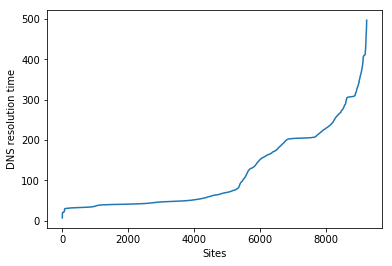

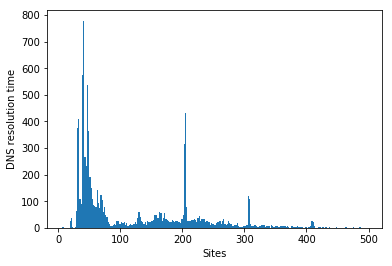

In [93]:
plt.plot(sorted(dns_times))
plt.xlabel('Sites')
plt.ylabel('DNS resolution time')
plt.show()

plt.hist(sorted(dns_times), int(max(dns_times))//2)

plt.xlabel('Sites')
plt.ylabel('DNS resolution time')
plt.show()

# Using kernel density

Generating a distribution similar to the above seen distribution based on the assumption that it takes this much time to get a dns record from over a network randomly.

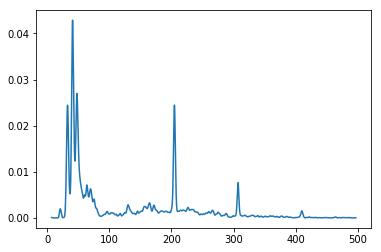

In [96]:
# arr, _, _ = plt.hist(X, int(max(dns_times))//2, normed=True)
X_plot = np.linspace(min(dns_times), max(dns_times), len(dns_times))[:, np.newaxis]
X = np.array(dns_times)[:, np.newaxis]
# for kernel in ['epanechnikov', 'tophat', 'gaussian']:

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
        label="kernel = '{0}'".format(kernel))
plt.show()

with open(r"kernel_density_model.pickle", "wb") as output_file:
    pickle.dump(kde, output_file)

# Usage docs:

Import the following packages:
```python
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import numpy as np
import pickle
```

Use the following to load the pickle object and generate samples:
```python
with open(r"kernel_density_model.pickle", "rb") as input_file:
     kde = cPickle.load(input_file)
```

and to generate samples:
```python
n = 1
time = kde.sample(n) #the time is in milliseconds
time.sleep(time[0]/1000)
```



# Verification of the estimator

Verifying whether the estimator works correctly by generating randomly 1000 samples

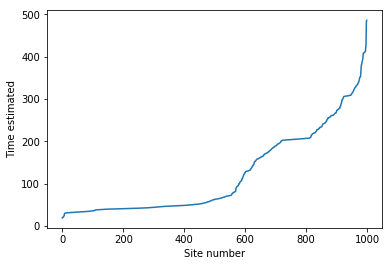

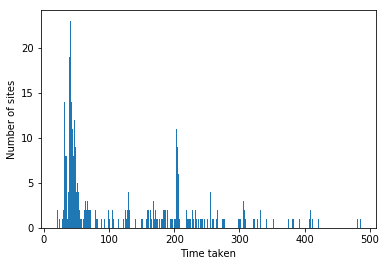

In [97]:
with open(r"kernel_density_model.pickle", "rb") as input_file:
     kde_loaded = pickle.load(input_file)

sample_arr = kde_loaded.sample(1000)
plt.figure()
plt.plot(sorted(sample_arr))
plt.xlabel('Site number')
plt.ylabel('Time estimated')
plt.figure()
plt.hist(sample_arr, 1000)
plt.xlabel('Time taken')
plt.ylabel('Number of sites')
plt.show()